## DX799S O1 Data Science Capstone (Summer 1 2025): ACTIVITY 3.3 ##

Each week, you will apply the concepts of that week to your Integrated Capstone Project’s dataset. In preparation for Milestone One, create a Jupyter Notebook (similar to in Module B, Semester Two) that illustrates these lessons. There are no specific questions to answer in your Jupyter Notebook files in this course; your general goal is to analyze your data, using the methods you have learned about in this course and in this program, and draw interesting conclusions. 

For Week 3, include concepts such as linear regression with forward and backward selection, PCR, and PLSR. Complete your Jupyter Notebook homework by 11:59 pm ET on Sunday. 

In Week 7, you will compile your findings from your Jupyter Notebook homework into your Milestone One assignment for grading. For full instructions and the rubric for Milestone One, refer to the following link.  

In [28]:
# ===================================
# Useful Imports: Add more as needed
# ===================================

# Standard Libraries
import os
import time
import math
import io
import zipfile
import requests
from urllib.parse import urlparse
from itertools import chain, combinations

# Data Science Libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mticker  # Optional: Format y-axis labels as dollars
import seaborn as sns

# Scikit-learn (Machine Learning)
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    RandomizedSearchCV, 
    RepeatedKFold
)
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector, f_regression, SelectKBest
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

The following dataset, "Video Review", is a collection of information that was created based on reviewable video evidence that outlines the events that resulted in a concussion during punt players in the NFL 2016-2017 season. The target, Primary_Impact_Type, outlines if the concussion occurred from the impact of Helmet-to-Helmet, Helmet-to-Body, or Helmet-to-Ground.

In [29]:
#Video Review Dataset with Feature Scaling

df_videoreview = pd.read_csv("video_review.csv")

label_encoder = LabelEncoder()

print("Object columns before encoding:")
print(df_videoreview.select_dtypes(include=['object']).columns)

for col in df_videoreview.select_dtypes(include=['object']).columns:
    df_videoreview[col] = label_encoder.fit_transform(df_videoreview[col].astype(str))


target_column = 'Primary_Impact_Type'  
X = df_videoreview.drop(columns=[target_column])
y = df_videoreview[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Object columns before encoding:
Index(['Player_Activity_Derived', 'Turnover_Related', 'Primary_Impact_Type',
       'Primary_Partner_GSISID', 'Primary_Partner_Activity_Derived',
       'Friendly_Fire'],
      dtype='object')


Step 1: Added Season_Year, RMSE: 1.0276
Step 2: Added Turnover_Related, RMSE: 1.0276
Step 3: Added Primary_Partner_GSISID, RMSE: 1.0282
Step 4: Added Player_Activity_Derived, RMSE: 1.0297
Step 5: Added GSISID, RMSE: 1.0579
Step 6: Added GameKey, RMSE: 1.0884
Step 7: Added Friendly_Fire, RMSE: 1.1565
Step 8: Added PlayID, RMSE: 1.2143
Step 9: Added Primary_Partner_Activity_Derived, RMSE: 1.3787

RMSE Score Table:
   Step    RMSE                     Feature Added
0     1  1.0276                       Season_Year
1     2  1.0276                  Turnover_Related
2     3  1.0282            Primary_Partner_GSISID
3     4  1.0297           Player_Activity_Derived
4     5  1.0579                            GSISID
5     6  1.0884                           GameKey
6     7  1.1565                     Friendly_Fire
7     8  1.2143                            PlayID
8     9  1.3787  Primary_Partner_Activity_Derived


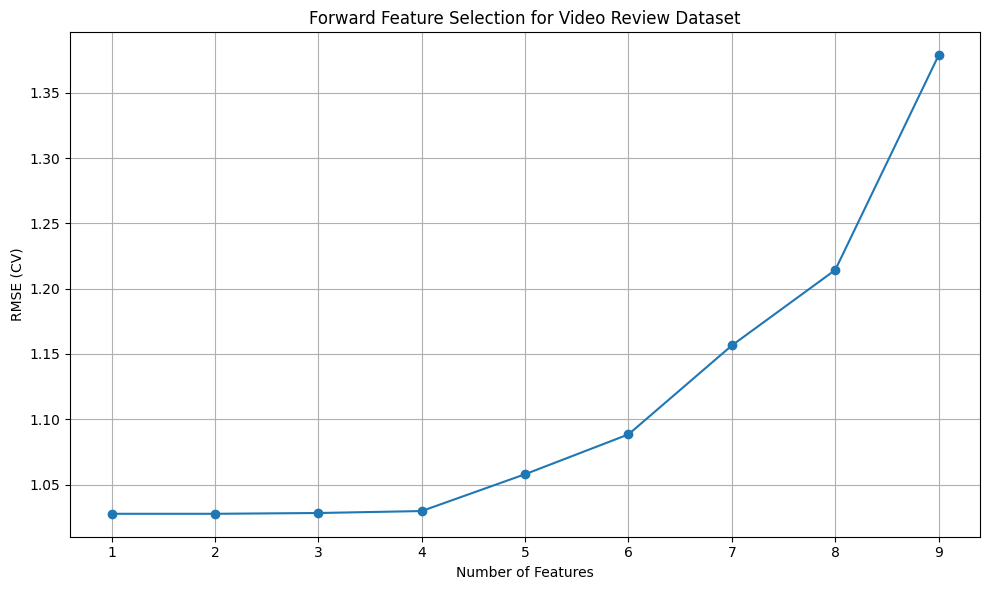

In [30]:
# Video Review Forward Feature Selection

model = LinearRegression()
X = pd.DataFrame(X_train_scaled, columns=X.columns)
y = y_train

selected_features = []
remaining_features = list(X.columns)
rmse_scores = []

while remaining_features:
    scores = []
    for feature in remaining_features:
        current_features = selected_features + [feature]
        # Use negative RMSE as scoring and convert to positive
        score = -cross_val_score(model, X[current_features], y, cv=5, scoring='neg_root_mean_squared_error').mean()
        scores.append((score, feature))
    
    scores.sort()  # lower RMSE is better
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    rmse_scores.append(round(best_score, 4))
    print(f"Step {len(selected_features)}: Added {best_feature}, RMSE: {best_score:.4f}")

results_df_video_review = pd.DataFrame({
    "Step": range(1, len(rmse_scores) + 1),
    "RMSE": rmse_scores,
    "Feature Added": selected_features
})

print("\nRMSE Score Table:")
print(results_df_video_review)

plt.figure(figsize=(10, 6))
plt.plot(results_df_video_review["Step"], results_df_video_review["RMSE"], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("RMSE (CV)")
plt.title("Forward Feature Selection for Video Review Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
best_step = results_df_video_review.loc[results_df_video_review['RMSE'].idxmin()]
print(f"\nBest Step for video review dataset:\n{best_step}")



Best Step for video review dataset:
Step                       1
RMSE                  1.0276
Feature Added    Season_Year
Name: 0, dtype: object


Step 1: Removed Primary_Partner_Activity_Derived, RMSE: 1.2143
Step 2: Removed PlayID, RMSE: 1.1565
Step 3: Removed Friendly_Fire, RMSE: 1.0884
Step 4: Removed GameKey, RMSE: 1.0579
Step 5: Removed GSISID, RMSE: 1.0297
Step 6: Removed Player_Activity_Derived, RMSE: 1.0282
Step 7: Removed Primary_Partner_GSISID, RMSE: 1.0276
Step 8: Removed Turnover_Related, RMSE: 1.0276

RMSE Score Table (Backward Elimination):
   Step    RMSE                   Feature Removed
0     1  1.2143  Primary_Partner_Activity_Derived
1     2  1.1565                            PlayID
2     3  1.0884                     Friendly_Fire
3     4  1.0579                           GameKey
4     5  1.0297                            GSISID
5     6  1.0282           Player_Activity_Derived
6     7  1.0276            Primary_Partner_GSISID
7     8  1.0276                  Turnover_Related


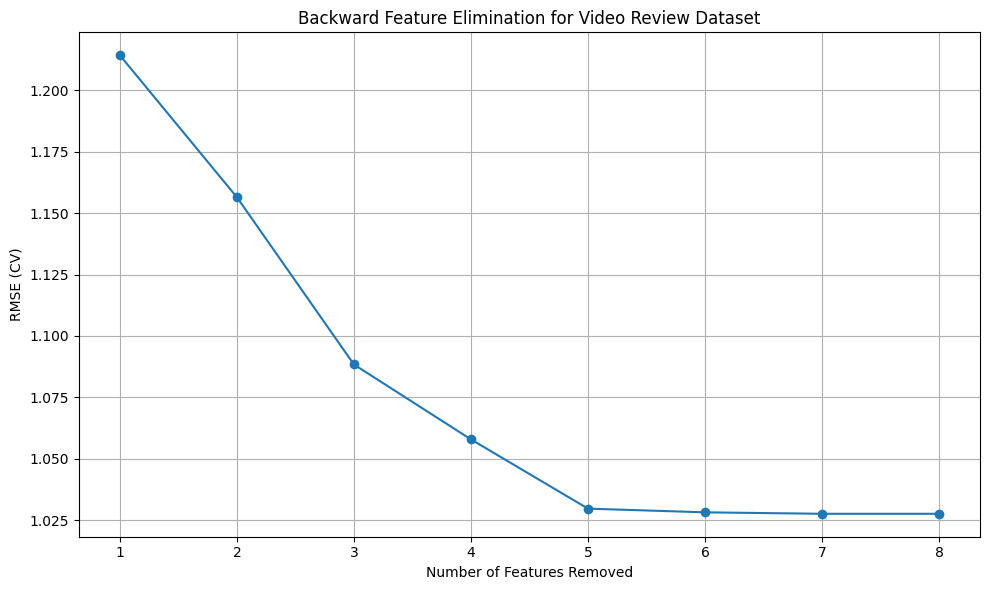

In [32]:
# Video Review Backward Feature Selection

model = LinearRegression()
X = pd.DataFrame(X_train_scaled, columns=X.columns)
y = y_train

selected_features = list(X.columns)
rmse_scores = []
features_removed = []

while len(selected_features) > 1:
    scores = []
    for feature in selected_features:
        current_features = [f for f in selected_features if f != feature]
        # Use negative RMSE and convert to positive
        score = -cross_val_score(model, X[current_features], y, cv=5, scoring='neg_root_mean_squared_error').mean()
        scores.append((score, feature))
    
    scores.sort()  # sort ascending to get lowest RMSE first
    best_score, feature_to_remove = scores[0]

    selected_features.remove(feature_to_remove)
    rmse_scores.append(round(best_score, 4))
    features_removed.append(feature_to_remove)
    
    print(f"Step {len(features_removed)}: Removed {feature_to_remove}, RMSE: {best_score:.4f}")

results_df_video_review_bwd = pd.DataFrame({
    "Step": range(1, len(rmse_scores) + 1),
    "RMSE": rmse_scores,
    "Feature Removed": features_removed
})

print("\nRMSE Score Table (Backward Elimination):")
print(results_df_video_review_bwd)

plt.figure(figsize=(10, 6))
plt.plot(results_df_video_review_bwd["Step"], results_df_video_review_bwd["RMSE"], marker='o')
plt.xlabel("Number of Features Removed")
plt.ylabel("RMSE (CV)")
plt.title("Backward Feature Elimination for Video Review Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()



In [33]:
best_step = results_df_video_review_bwd.loc[results_df_video_review_bwd['RMSE'].idxmin()]
print(f"\nBest Step during backward selection for video review dataset:\n{best_step}")


Best Step during backward selection for video review dataset:
Step                                    7
RMSE                               1.0276
Feature Removed    Primary_Partner_GSISID
Name: 6, dtype: object


In [34]:
# Video Review PCA

target_column = 'Primary_Impact_Type'  
X = df_videoreview.drop(columns=[target_column])
y = df_videoreview[target_column]

n_components = min(X_train.shape[1], 10)  
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_pca, y_train)

y_train_pred = lr.predict(X_train_pca)

rmse_pcr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f'PCR RMSE for Video Review Dataset: {rmse_pcr_train:.4f}')


PCR RMSE for Video Review Dataset: 0.8843


In [35]:
# Video Review PLSR

target_column = 'Primary_Impact_Type'
X = df_videoreview.drop(columns=[target_column])
y = df_videoreview[target_column]

X_train = X
y_train = y

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

n_components = min(X_train.shape[1], 10)
pls = PLSRegression(n_components=n_components)
pls.fit(X_train_scaled, y_train_scaled)

y_train_pred_scaled = pls.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

rmse_plsr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'PLSR RMSE for Video Review dataset: {rmse_plsr_train:.4f}')



PLSR RMSE for Video Review dataset: 268132916398586.3125


The next dataset, Injury Record, looks to determine the relationship between the playing surface and the injury and performance of NFL athletes. The Injury Record dataset accounts for 105 lower-limbs injuries that occurred over two seasons during the regular NFL season and provides information on the surface the game occurred on and the number of days the player missed due to injury (or how severe it was). The target in this case is surface which lists the type of surface (synethic or natural) the field was when the injury occurred.

In [36]:
df_injuryrecord = pd.read_csv("InjuryRecord.csv")

In [37]:
#Injury Record Dataset with Feature Scaling


label_encoder = LabelEncoder()

print("Object columns before encoding:")
print(df_injuryrecord.select_dtypes(include=['object']).columns)

for col in df_injuryrecord.select_dtypes(include=['object']).columns:
    df_injuryrecord[col] = label_encoder.fit_transform(df_injuryrecord[col].astype(str))


target_column = 'Surface'  
X_injury = df_injuryrecord.drop(columns=[target_column])
y_injury = df_injuryrecord[target_column]

X_train, X_test, y_train, y_test = train_test_split(X_injury, y_injury, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Object columns before encoding:
Index(['GameID', 'PlayKey', 'BodyPart', 'Surface'], dtype='object')


Step 1: Added PlayKey, RMSE: 0.5082
Step 2: Added DM_M28, RMSE: 0.5079
Step 3: Added DM_M42, RMSE: 0.5076
Step 4: Added DM_M1, RMSE: 0.5076
Step 5: Added GameID, RMSE: 0.5094
Step 6: Added PlayerKey, RMSE: 0.5146
Step 7: Added BodyPart, RMSE: 0.5208
Step 8: Added DM_M7, RMSE: 0.5307

RMSE Score Table:
   Step    RMSE Feature Added
0     1  0.5082       PlayKey
1     2  0.5079        DM_M28
2     3  0.5076        DM_M42
3     4  0.5076         DM_M1
4     5  0.5094        GameID
5     6  0.5146     PlayerKey
6     7  0.5208      BodyPart
7     8  0.5307         DM_M7


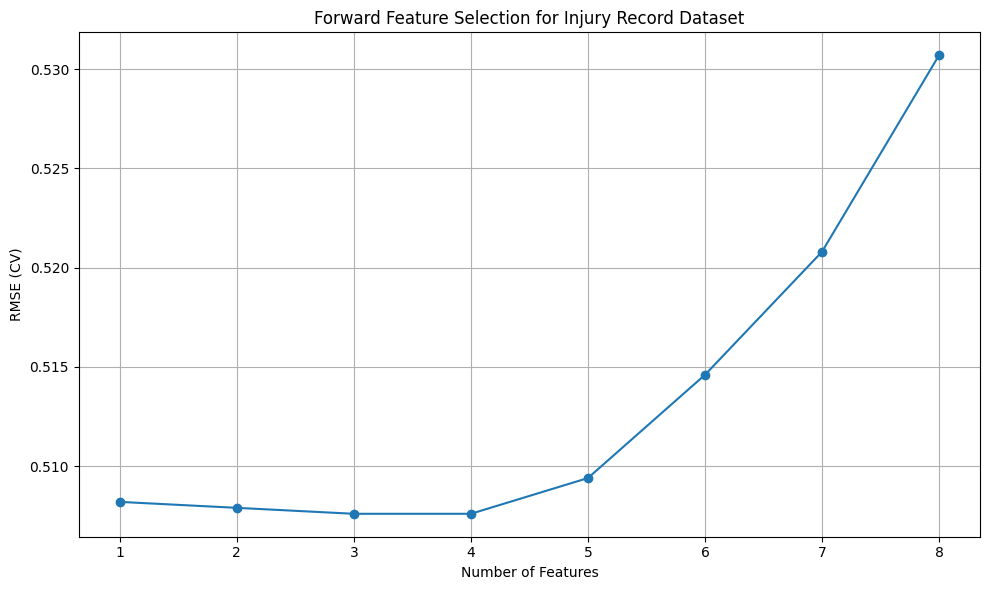

In [38]:
# Injury Record Forward Feature Selection

model = LinearRegression()
X = pd.DataFrame(X_train_scaled, columns=X_injury.columns)
y = y_train

selected_features = []
remaining_features = list(X.columns)
rmse_scores = []

while remaining_features:
    scores = []
    for feature in remaining_features:
        current_features = selected_features + [feature]
        score = -cross_val_score(model, X[current_features], y, cv=5, scoring='neg_root_mean_squared_error').mean()
        scores.append((score, feature))
    
    scores.sort()  
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    rmse_scores.append(round(best_score, 4))
    print(f"Step {len(selected_features)}: Added {best_feature}, RMSE: {best_score:.4f}")

results_df_injury_record = pd.DataFrame({
    "Step": range(1, len(rmse_scores) + 1),
    "RMSE": rmse_scores,
    "Feature Added": selected_features
})

print("\nRMSE Score Table:")
print(results_df_injury_record)

plt.figure(figsize=(10, 6))
plt.plot(results_df_injury_record["Step"], results_df_injury_record["RMSE"], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("RMSE (CV)")
plt.title("Forward Feature Selection for Injury Record Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()



In [39]:
best_step = results_df_injury_record.loc[results_df_injury_record['RMSE'].idxmin()]
print(f"\nBest Step forward selection for Injury Record dataset:\n{best_step}")


Best Step forward selection for Injury Record dataset:
Step                  3
RMSE             0.5076
Feature Added    DM_M42
Name: 2, dtype: object


Step 1: Removed DM_M7, RMSE: 0.5208
Step 2: Removed BodyPart, RMSE: 0.5146
Step 3: Removed PlayerKey, RMSE: 0.5094
Step 4: Removed GameID, RMSE: 0.5076
Step 5: Removed DM_M1, RMSE: 0.5076
Step 6: Removed DM_M42, RMSE: 0.5079
Step 7: Removed DM_M28, RMSE: 0.5082

RMSE Score Table (Backward Elimination):
   Step    RMSE Feature Removed
0     1  0.5208           DM_M7
1     2  0.5146        BodyPart
2     3  0.5094       PlayerKey
3     4  0.5076          GameID
4     5  0.5076           DM_M1
5     6  0.5079          DM_M42
6     7  0.5082          DM_M28


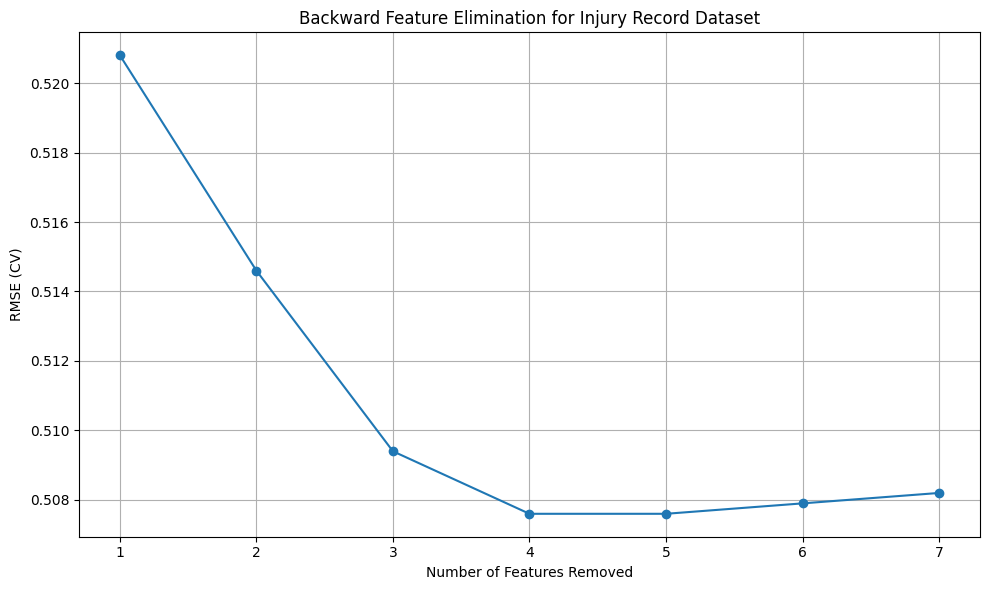

In [40]:
# Injury Record Backward Feature Selection


model = LinearRegression()
X = pd.DataFrame(X_train_scaled, columns=X_injury.columns)
y = y_train

selected_features = list(X.columns)
rmse_scores = []
features_removed = []

while len(selected_features) > 1:
    scores = []
    for feature in selected_features:
        current_features = [f for f in selected_features if f != feature]
        # Use negative RMSE and convert to positive
        score = -cross_val_score(model, X[current_features], y, cv=5, scoring='neg_root_mean_squared_error').mean()
        scores.append((score, feature))
    
    scores.sort()  # ascending order, lowest RMSE first
    best_score, feature_to_remove = scores[0]

    selected_features.remove(feature_to_remove)
    rmse_scores.append(round(best_score, 4))
    features_removed.append(feature_to_remove)
    
    print(f"Step {len(features_removed)}: Removed {feature_to_remove}, RMSE: {best_score:.4f}")

results_df_injury_record_bwd = pd.DataFrame({
    "Step": range(1, len(rmse_scores) + 1),
    "RMSE": rmse_scores,
    "Feature Removed": features_removed
})

print("\nRMSE Score Table (Backward Elimination):")
print(results_df_injury_record_bwd)

plt.figure(figsize=(10, 6))
plt.plot(results_df_injury_record_bwd["Step"], results_df_injury_record_bwd["RMSE"], marker='o')
plt.xlabel("Number of Features Removed")
plt.ylabel("RMSE (CV)")
plt.title("Backward Feature Elimination for Injury Record Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()



In [41]:
best_step = results_df_injury_record_bwd.loc[results_df_injury_record_bwd['RMSE'].idxmax()]
print(f"\nBest Step backward selection for Injury Record dataset:\n{best_step}")


Best Step backward selection for Injury Record dataset:
Step                    1
RMSE               0.5208
Feature Removed     DM_M7
Name: 0, dtype: object


In [42]:
# Injury Record PCA

target_column = 'Surface'  
X_injury = df_injuryrecord.drop(columns=[target_column])
y_injury = df_injuryrecord[target_column]

n_components = min(X_train.shape[1], 10)  
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_pca, y_train)

y_train_pred = lr.predict(X_train_pca)

rmse_pcr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f'PCR RMSE for Injury Record Dataset: {rmse_pcr_train:.4f}')


PCR RMSE for Injury Record Dataset: 0.4834


In [43]:
# Injury Record PLSR

target_column = 'Surface'  
X_injury = df_injuryrecord.drop(columns=[target_column])
y_injury = df_injuryrecord[target_column]

X_train = X
y_train = y

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

n_components = min(X_train.shape[1], 10)
pls = PLSRegression(n_components=n_components)
pls.fit(X_train_scaled, y_train_scaled)

y_train_pred_scaled = pls.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

rmse_plsr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'PLSR RMSE for Injury Record dataset: {rmse_plsr_train:.4f}')


PLSR RMSE for Injury Record dataset: 83465167998206.1875


The last dataset, Concussion, contains a list of concussion injuries that occurred in the National Football League from the year 2012 to 2014. The data includes features such as Position, Pre-Season Injury?, Week of Injury, Weeks Injured, Games Missed, Reported Injury Type, Average Playtime Before Injury, etc. The target in this case will be "Reported Injury Type" which will be limited to just concussions.

In [44]:
df_concussion = pd.read_csv("Concussion Injuries 2012-2014 (1).csv")
df_clean_concussion = df_concussion.drop(columns=['ID', 'Player', 'Game', 'Date', 'Winning Team?', 'Unknown Injury?'])
df_clean_concussion = df_clean_concussion.dropna()

In [45]:
#Concussion Dataset with Feature Scaling

label_encoder = LabelEncoder()

for col in df_clean_concussion.select_dtypes(include=['object']).columns:
    df_clean_concussion[col] = label_encoder.fit_transform(df_clean_concussion[col].astype(str))

target_column = 'Reported Injury Type'  
X_concussion = df_clean_concussion.drop(columns=[target_column])
y_concussion = df_clean_concussion[target_column]

X_train, X_test, y_train, y_test = train_test_split(X_concussion, y_concussion, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Step 1: Added Season, RMSE: 0.3686
Step 2: Added Opposing Team, RMSE: 0.3685
Step 3: Added Pre-Season Injury?, RMSE: 0.3685
Step 4: Added Weeks Injured, RMSE: 0.3685
Step 5: Added Games Missed, RMSE: 0.3687
Step 6: Added Team, RMSE: 0.3685
Step 7: Added Total Snaps, RMSE: 0.3687
Step 8: Added Position, RMSE: 0.3692
Step 9: Added Play Time After Injury, RMSE: 0.3696
Step 10: Added Week of Injury, RMSE: 0.3708
Step 11: Added Average Playtime Before Injury, RMSE: 0.3721

RMSE Score Table:
    Step    RMSE                   Feature Added
0      1  0.3686                          Season
1      2  0.3685                   Opposing Team
2      3  0.3685              Pre-Season Injury?
3      4  0.3685                   Weeks Injured
4      5  0.3687                    Games Missed
5      6  0.3685                            Team
6      7  0.3687                     Total Snaps
7      8  0.3692                        Position
8      9  0.3696          Play Time After Injury
9     10  0.3708   

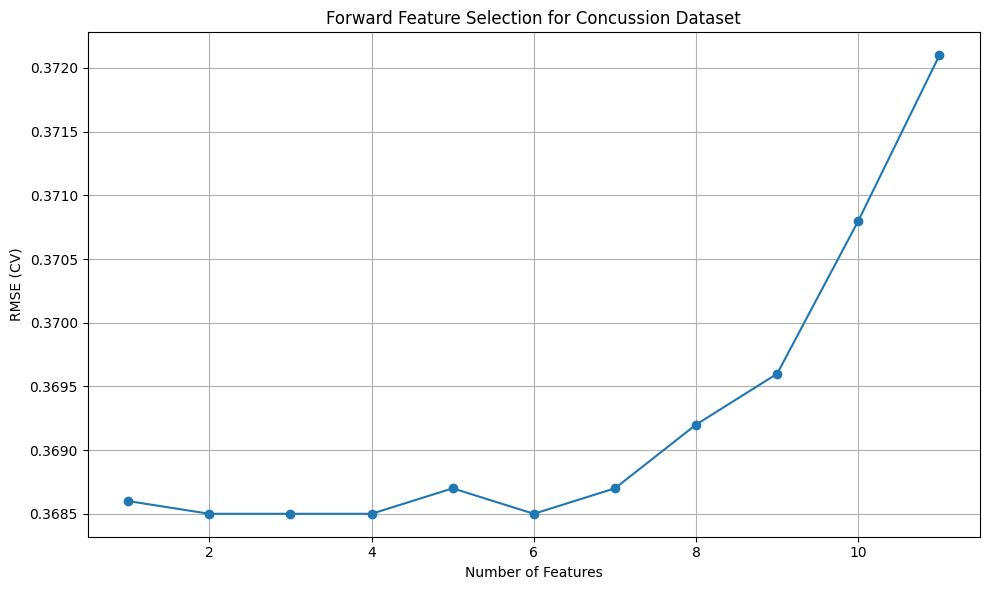

In [46]:
# Concussion Forward Feature Selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt

model = LinearRegression()
X = pd.DataFrame(X_train_scaled, columns=X_concussion.columns)
y = y_train

selected_features = []
remaining_features = list(X.columns)
rmse_scores = []

while remaining_features:
    scores = []
    for feature in remaining_features:
        current_features = selected_features + [feature]
        score = -cross_val_score(model, X[current_features], y, cv=5, scoring='neg_root_mean_squared_error').mean()
        scores.append((score, feature))
    
    scores.sort()  
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    rmse_scores.append(round(best_score, 4))
    print(f"Step {len(selected_features)}: Added {best_feature}, RMSE: {best_score:.4f}")

results_df_concussion = pd.DataFrame({
    "Step": range(1, len(rmse_scores) + 1),
    "RMSE": rmse_scores,
    "Feature Added": selected_features
})

print("\nRMSE Score Table:")
print(results_df_concussion)

plt.figure(figsize=(10, 6))
plt.plot(results_df_concussion["Step"], results_df_concussion["RMSE"], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("RMSE (CV)")
plt.title("Forward Feature Selection for Concussion Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()



In [47]:
best_step = results_df_concussion.loc[results_df_concussion['RMSE'].idxmax()]
print(f"\nBest Step forward selection for Concussion dataset:\n{best_step}")


Best Step forward selection for Concussion dataset:
Step                                         11
RMSE                                     0.3721
Feature Added    Average Playtime Before Injury
Name: 10, dtype: object


Step 1: Removed Average Playtime Before Injury, RMSE: 0.3708
Step 2: Removed Week of Injury, RMSE: 0.3696
Step 3: Removed Opposing Team, RMSE: 0.3688
Step 4: Removed Position, RMSE: 0.3685
Step 5: Removed Play Time After Injury, RMSE: 0.3681
Step 6: Removed Total Snaps, RMSE: 0.3679
Step 7: Removed Pre-Season Injury?, RMSE: 0.3679
Step 8: Removed Weeks Injured, RMSE: 0.3679
Step 9: Removed Games Missed, RMSE: 0.3686
Step 10: Removed Team, RMSE: 0.3686

RMSE Score Table (Backward Elimination):
   Step    RMSE                 Feature Removed
0     1  0.3708  Average Playtime Before Injury
1     2  0.3696                  Week of Injury
2     3  0.3688                   Opposing Team
3     4  0.3685                        Position
4     5  0.3681          Play Time After Injury
5     6  0.3679                     Total Snaps
6     7  0.3679              Pre-Season Injury?
7     8  0.3679                   Weeks Injured
8     9  0.3686                    Games Missed
9    10  0.3686       

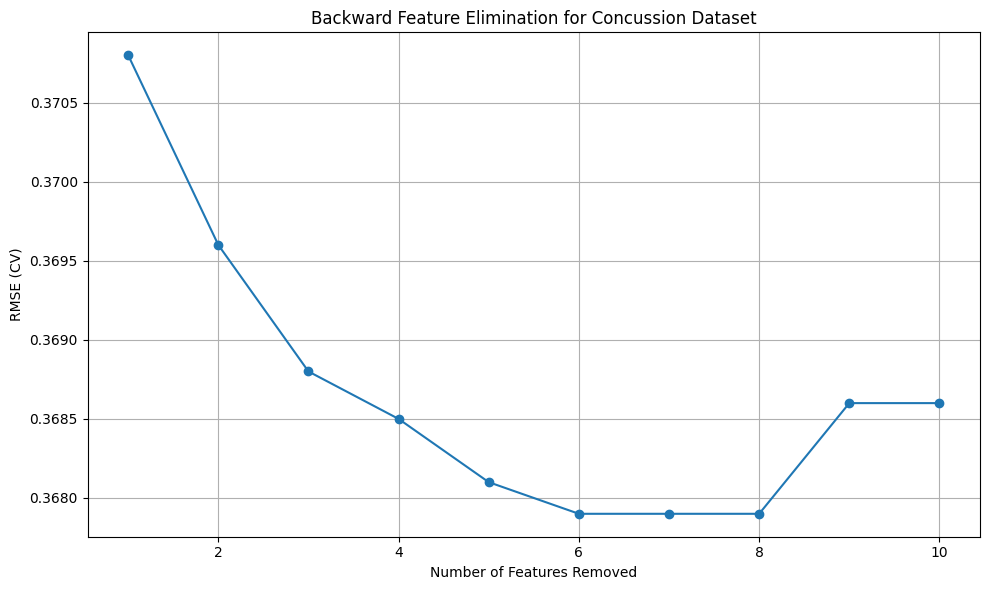

In [48]:
# Concussion Backward Feature Selection

model = LinearRegression()
X = pd.DataFrame(X_train_scaled, columns=X_concussion.columns)
y = y_train

selected_features = list(X.columns)
rmse_scores = []
features_removed = []

while len(selected_features) > 1:
    scores = []
    for feature in selected_features:
        current_features = [f for f in selected_features if f != feature]
        score = -cross_val_score(model, X[current_features], y, cv=5, scoring='neg_root_mean_squared_error').mean()
        scores.append((score, feature))
    
    scores.sort()  
    best_score, feature_to_remove = scores[0]

    selected_features.remove(feature_to_remove)
    rmse_scores.append(round(best_score, 4))
    features_removed.append(feature_to_remove)
    
    print(f"Step {len(features_removed)}: Removed {feature_to_remove}, RMSE: {best_score:.4f}")

results_df_concussion_bwd = pd.DataFrame({
    "Step": range(1, len(rmse_scores) + 1),
    "RMSE": rmse_scores,
    "Feature Removed": features_removed
})

print("\nRMSE Score Table (Backward Elimination):")
print(results_df_concussion_bwd)

plt.figure(figsize=(10, 6))
plt.plot(results_df_concussion_bwd["Step"], results_df_concussion_bwd["RMSE"], marker='o')
plt.xlabel("Number of Features Removed")
plt.ylabel("RMSE (CV)")
plt.title("Backward Feature Elimination for Concussion Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()



In [49]:
best_step = results_df_concussion_bwd.loc[results_df_concussion_bwd['RMSE'].idxmax()]
print(f"\nBest Step backward selection for Concussion dataset:\n{best_step}")


Best Step backward selection for Concussion dataset:
Step                                            1
RMSE                                       0.3708
Feature Removed    Average Playtime Before Injury
Name: 0, dtype: object


In [50]:
# Concussion PCA

target_column = 'Reported Injury Type'  
X_concussion = df_clean_concussion.drop(columns=[target_column])
y_concussion = df_clean_concussion[target_column]

n_components = min(X_train.shape[1], 10)  
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_pca, y_train)

y_train_pred = lr.predict(X_train_pca)

rmse_pcr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f'PCR RMSE for Concussion Dataset: {rmse_pcr_train:.4f}')

PCR RMSE for Concussion Dataset: 0.3511


In [51]:
# Concussion PLSR

target_column = 'Reported Injury Type'  
X_concussion = df_clean_concussion.drop(columns=[target_column])
y_concussion = df_clean_concussion[target_column]

X_train = X
y_train = y

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

n_components = min(X_train.shape[1], 10)
pls = PLSRegression(n_components=n_components)
pls.fit(X_train_scaled, y_train_scaled)

y_train_pred_scaled = pls.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

rmse_plsr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'PLSR RMSE for Concussion dataset: {rmse_plsr_train:.4f}')


PLSR RMSE for Concussion dataset: 169197897381053.2188
